In [2]:
## Required modules for below analysis.

from selenium import webdriver
import time
from bs4 import BeautifulSoup as bs
import pandas as pd
from matplotlib import pyplot as plt
import html

In [3]:
## Extraction of data related to house rentals (location : Nizampet) from website housing.com using scraping packages. 

##Selenium package is used to interact with websites though http protocols to extract information from website and Beautiful soup for extracting information from particular tags. It can be done using selenium alone, again it is upto developers preference.

## First step - Opening chrome browser without manual intervention using selenium . Before we proceed further, make sure that chromedriver is installed on your OS.

driver=webdriver.Chrome()

## request the website for page content

driver.get("https://housing.com/rent/search-P1wkiyiuy2aujb8n2")

## scroll down to end of the page untill no content is loaded further. This step is applied to webistes which has infinite scrolling lik we see in e commerce websites.

for i in range(1,15):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(4)
html=driver.page_source
driver.close()
page=bs(html,"html.parser")

## finding html tags containing rental details such as price,place,no of bedrooms,Area etc...

elements=page.findAll("article",{"class":"css-8jw9t9"})

In [4]:
## loop though all the tags and collect info and store them in lists.

records_set=[]
for i in elements:
    price=i.find("div",{"data-q":"price"})
    details=i.find("a",{"class":"css-dk6esa"})
    address=i.find("a",{"data-q":"address"})
    features=i.findAll("span",{"class":"css-1kdq3fk"})
    records_set.append([price.text,details.text,address.text,features[0].text,features[1].text])

In [5]:
## import data from list to dataframe for analysis

df=pd.DataFrame(records_set)
df.columns=["Price","Details","Address","features","Area"]

## Check for nulls present in all columns using below code

df.describe()

## Found no missing values and so we move on to next part of data pre- processing

## Type conversions for columns inorder to apply some filtering as well as aggregations operations.

df["Bedrooms"]=df["Details"].apply(lambda x:int(x.split(" ")[0]))
df["House_type"]=df["Details"].apply(lambda x:x.split(" ")[2])
df.drop(columns=["Details"],inplace=True)
df["Area"]=df["Area"].apply(lambda x:float(x.split(" ")[0]))
df["Price"]=df["Price"].apply(lambda x:int("".join(x.split(","))))
df[["Address","features","House_type"]]=df[["Address","features","House_type"]].astype(str)

## There might be a chance of a person placing the same advertisement multitple times on website. Hence we are removing the duplicates by keeping a copy of each.

df.drop_duplicates(keep='first',inplace=True)


## Load data to csv file

df.to_csv("house_rentals.csv",header=True,index=False,mode='w')

## Filter the data by House type Apartment ( Our analysis is limited to apartments for now)

df1=df[df["House_type"]=="Apartment"]

## check correlation between Target variable=Price and features = Area and number of bedrooms (pair wise correlation)

corr_price_Area=df1["Price"].corr(df1["Area"],method='pearson')
corr_price_bedrooms=df1["Price"].corr(df1["Bedrooms"],method='pearson')

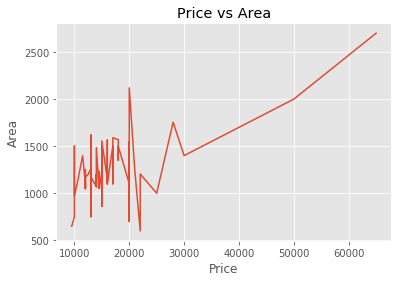

In [9]:
## Created a line plot with dependent and independent variable using matplotlib package. 

## Below step is just for plot style. There are many styles available , refer to documentation.

plt.style.use("ggplot")

## Syntax to create line plot between Price and Area variables.

df2=df1.sort_values("Price",ascending=False)

plt.plot(df2["Price"],df2["Area"])
plt.xlabel("Price")
plt.ylabel("Area")
plt.title("Price vs Area")
plt.savefig("House_price_vs_Area.png")